In [1]:
# Plot data and differnce to check correctness of the implementation. The folder ./outSMatlab host data from the matlab version of the code taken from the course 
# Advanced Numerical Methods for Environmental Modeling of Trento University, a.y. 2022/2023, teacher Prof.Ilya Peshkov.
# Folder ./outPc++ and ./outSc++ host results of the c++ implementation that can be compiled with g++ or mpicxx.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def plotdata(i):
    #polot data of the three implementation: matlab, c++ compiled with g++ and c++ compiled with mpicxx -DPARALLEL
    fig, axes = plt.subplots(ncols=3, figsize=(24, 8))
    ax1, ax2, ax3 = axes
    nx, ny = [512,512]  # parse; advance file-pointer to data segment

    fig.suptitle("Advection velocity",size=18)

    # Heat maps.

    fname = "outSMatlab/data{:0{width}d}.txt".format(i, width=2)
    dataSM = np.loadtxt(fname, dtype=np.double, delimiter=',').T
    im1 = ax1.matshow(dataSM, cmap='coolwarm')
    ax1.set_title("Serial", y=-0.1, size=15)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor', size=15)
    plt.setp(ax1.get_yticklabels(), rotation_mode='anchor', size=15)
    plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1).set_label(label='q',size=17,)

    fname = "outPc++/Adv_{:0{width}d}.bin".format(i, width=2)
    with open(fname, 'rb') as f:
        tmp = np.fromfile(f, dtype=np.double, count=nx*ny)
        dataP = np.reshape(tmp, [nx, ny], order='F')

    # # Use this if you want to know the times of the parallel output
    # fname = "outPc++/FileTime.txt"
    # times = np.loadtxt(fname, dtype=np.double, delimiter=',')
    # ax2.set_title("t = " + "{:2.1f}".format(times[i]), y=-0.1, size=15)

    im2 = ax2.matshow(dataP, cmap='coolwarm')
    ax2.set_title("Parallel c++", y=-0.1, size=15)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor', size=15)
    plt.setp(ax2.get_yticklabels(), rotation_mode='anchor', size=15)
    plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2).set_label(label='q',size=17)

    fname = "outSc++/Adv_{:0{width}d}.bin".format(i, width=2)
    with open(fname, 'rb') as f:
        tmp = np.fromfile(f, dtype=np.double, count=nx*ny)
        dataSc = np.reshape(tmp, [nx, ny], order='F')
    im3 = ax3.matshow(dataSc, cmap='coolwarm')
    ax3.set_title("Serial c++", y=-0.1, size=15)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor', size=15)
    plt.setp(ax2.get_yticklabels(), rotation_mode='anchor', size=15)
    plt.colorbar(im3, fraction=0.045, pad=0.05, ax=ax3).set_label(label='q',size=17)


    fig.tight_layout()
    # plt.savefig("figs/sol" + str(i) + ".png", format="png")
    plt.show()

In [146]:
def Matlab_vs_Scpp(i):
    #plot difference between results obtained in a serial implementation done with matlab (LinAdv.m) against
    # the serial version implemented in c++ (parAdv.cpp compiled with g++)
    fig, ax = plt.subplots(figsize=(8,8))
    nx, ny = [512,512]  # parse; advance file-pointer to data segment
    
    fname = "outSc++/Adv_{:0{width}d}.bin".format(i, width=2)
    with open(fname, 'rb') as f:
        tmp = np.fromfile(f, dtype=np.double, count=nx*ny)
        dataSc = np.reshape(tmp, [nx, ny], order='F')

    fname = "outSMatlab/data{:0{width}d}.txt".format(i, width=2)
    dataSM = np.loadtxt(fname, dtype=np.double, delimiter=',').T
    
    # # Use this if you want to know the times of the parallel output
    fname = "outPc++/FileTime.txt"
    times = np.loadtxt(fname, dtype=np.double, delimiter=',')
    ax.set_title("Matlab vs c++ (serial),\nt = " + "{:2.1f}".format(times[i]))

    # Heat maps.
    data = np.abs((dataSM - dataSc))
    im = ax.matshow(data, cmap='coolwarm',vmin=np.min(data), vmax=np.max(data))

    plt.setp(ax.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor', size=15)
    plt.setp(ax.get_yticklabels(), rotation_mode='anchor', size=15)
    plt.colorbar(im, fraction=0.045, pad=0.05, ax=ax).set_label(label='|M-c++|',size=17)

    fig.tight_layout()
    # plt.savefig("figs/MS" + str(i) + ".png", format="png")
    plt.show()

In [147]:
def Matlab_vs_Pcpp(i):
    # plot difference between results obtained in a serial implementation done with matlab (LinAdv.m) against
    # the parallel version implemented in c++ (parAdv.cpp compiled with mpicxx -lm - DPARALLEL- std=c++11)
    fig, ax = plt.subplots(figsize=(8,8))
    nx, ny = [512,512]  # parse; advance file-pointer to data segment

    fname = "outPc++/Adv_{:0{width}d}.bin".format(i, width=2)
    with open(fname, 'rb') as f:
        tmp = np.fromfile(f, dtype=np.double, count=nx*ny)
        dataP = np.reshape(tmp, [nx, ny], order='F')

    fname = "outSMatlab/data{:0{width}d}.txt".format(i, width=2)
    dataS = np.loadtxt(fname, dtype=np.double, delimiter=',').T

    
    # # Use this if you want to know the times of the parallel output
    fname = "outPc++/FileTime.txt"
    times = np.loadtxt(fname, dtype=np.double, delimiter=',')
    ax.set_title("Matlab vs c++ (parallel),\nt = " + "{:2.1f}".format(times[i]))

    # Heat maps.
    data = np.abs((dataS - dataP))
    im = ax.matshow(data, cmap='coolwarm',vmin=np.min(data), vmax=np.max(data))

    plt.setp(ax.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor', size=15)
    plt.setp(ax.get_yticklabels(), rotation_mode='anchor', size=15)
    plt.colorbar(im, fraction=0.045, pad=0.05, ax=ax).set_label(label='|M-c++|',size=17)

    fig.tight_layout()
    # plt.savefig("figs/MP" + str(i) + ".png", format="png")
    plt.show()

In [148]:
def Scpp_vs_Pcpp(i):
    # plot difference between results obtained in a serial implementation done with c++ (parAdv.cpp compiled with g++) against
    # the parallel version implemented in c++ (parAdv.cpp compiled with mpicxx -lm - DPARALLEL- std=c++11)
    fig, ax = plt.subplots(figsize=(8,8))
    nx, ny = [512,512]  # parse; advance file-pointer to data segment

    fname = "outPc++/Adv_{:0{width}d}.bin".format(i, width=2)
    with open(fname, 'rb') as f:
        tmp = np.fromfile(f, dtype=np.double, count=nx*ny)
        dataP = np.reshape(tmp, [nx, ny], order='F')

    fname = "outSc++/Adv_{:0{width}d}.bin".format(i, width=2)
    with open(fname, 'rb') as f:
        tmp = np.fromfile(f, dtype=np.double, count=nx*ny)
        dataS = np.reshape(tmp, [nx, ny], order='F')

    # # Use this if you want to know the times of the parallel output
    fname = "outPc++/FileTime.txt"
    times = np.loadtxt(fname, dtype=np.double, delimiter=',')
    ax.set_title("Paralle vs serial, c++,\nt = " + "{:2.1f}".format(times[i]))

    # Heat maps.
    data = np.abs((dataS - dataP))
    im = ax.matshow(data, cmap='coolwarm',vmin=np.min(data), vmax=np.max(data))

    plt.setp(ax.get_xticklabels(), rotation=45, ha='left', rotation_mode='anchor', size=15)
    plt.setp(ax.get_yticklabels(), rotation_mode='anchor', size=15)
    plt.colorbar(im, fraction=0.045, pad=0.05, ax=ax).set_label(label='|S-P|',size=17)

    fig.tight_layout()
    # plt.savefig("figs/PS" + str(i) + ".png", format="png")
    plt.show()

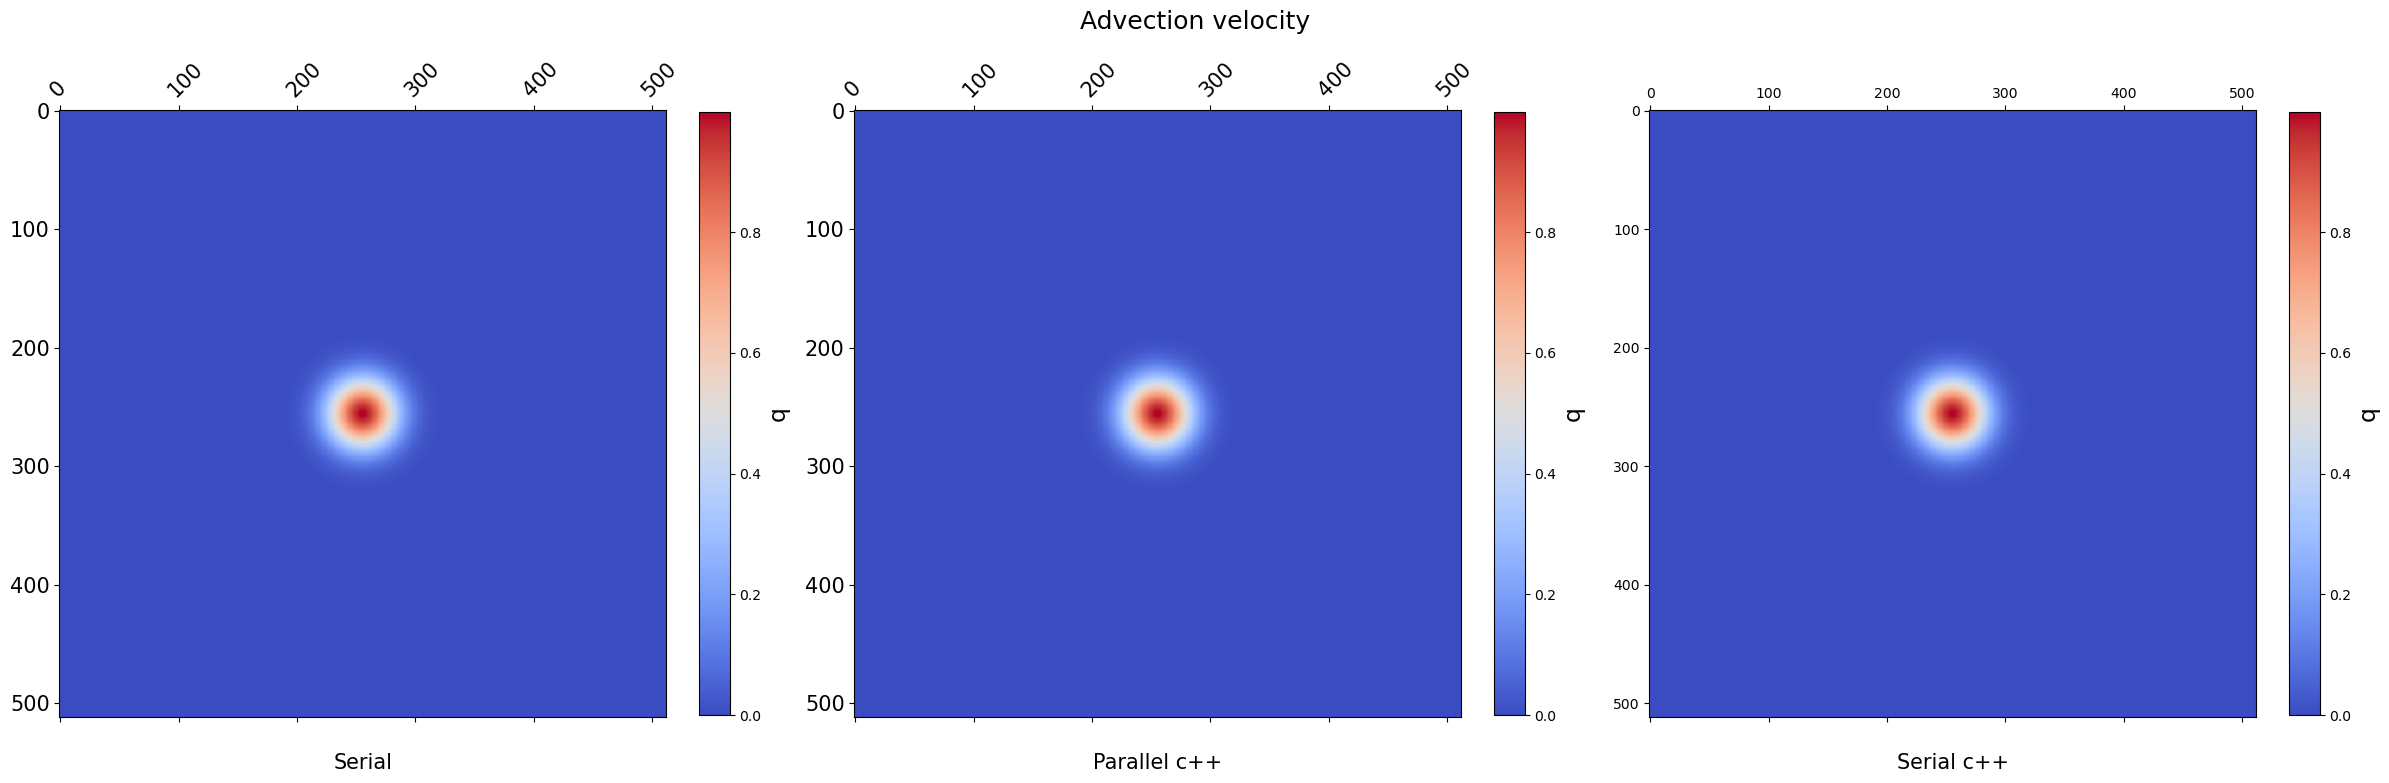

In [149]:
plotdata(0)

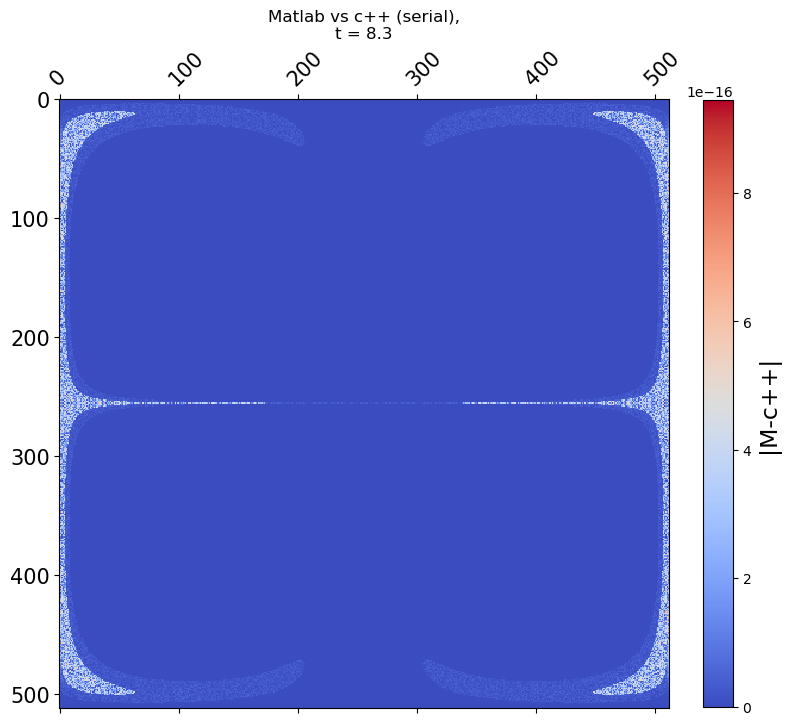

In [150]:
Matlab_vs_Scpp(5)

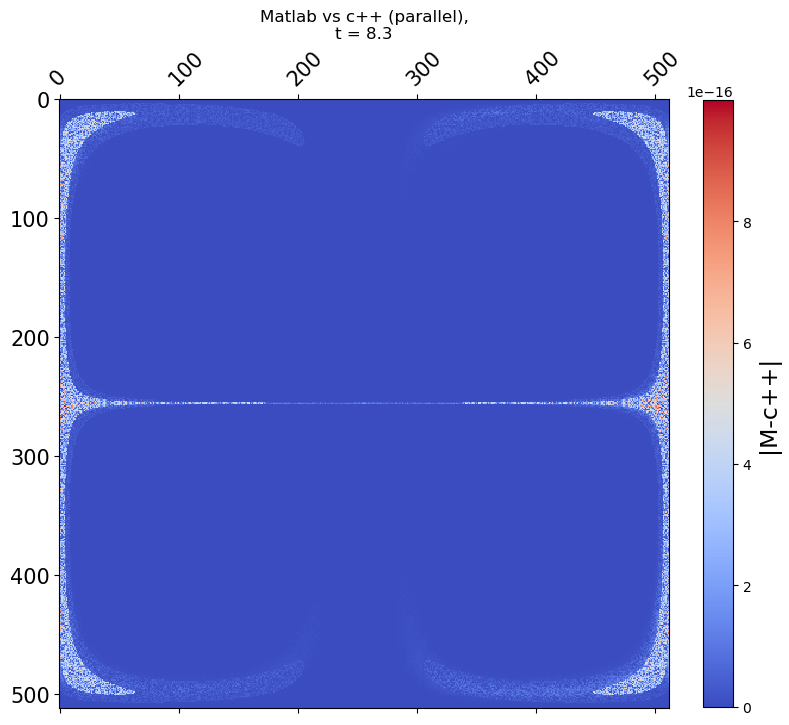

In [151]:
Matlab_vs_Pcpp(5)

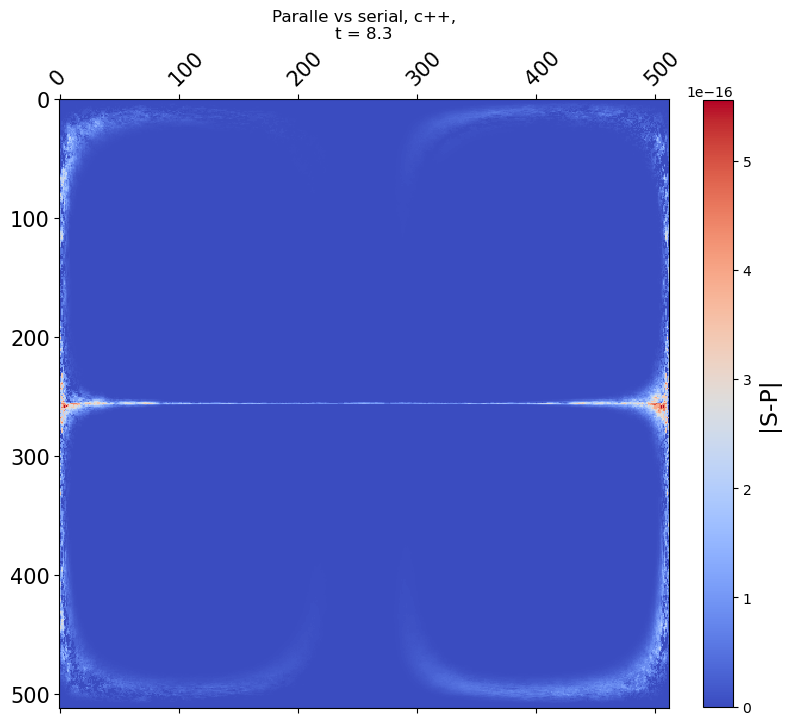

In [152]:
Scpp_vs_Pcpp(5)

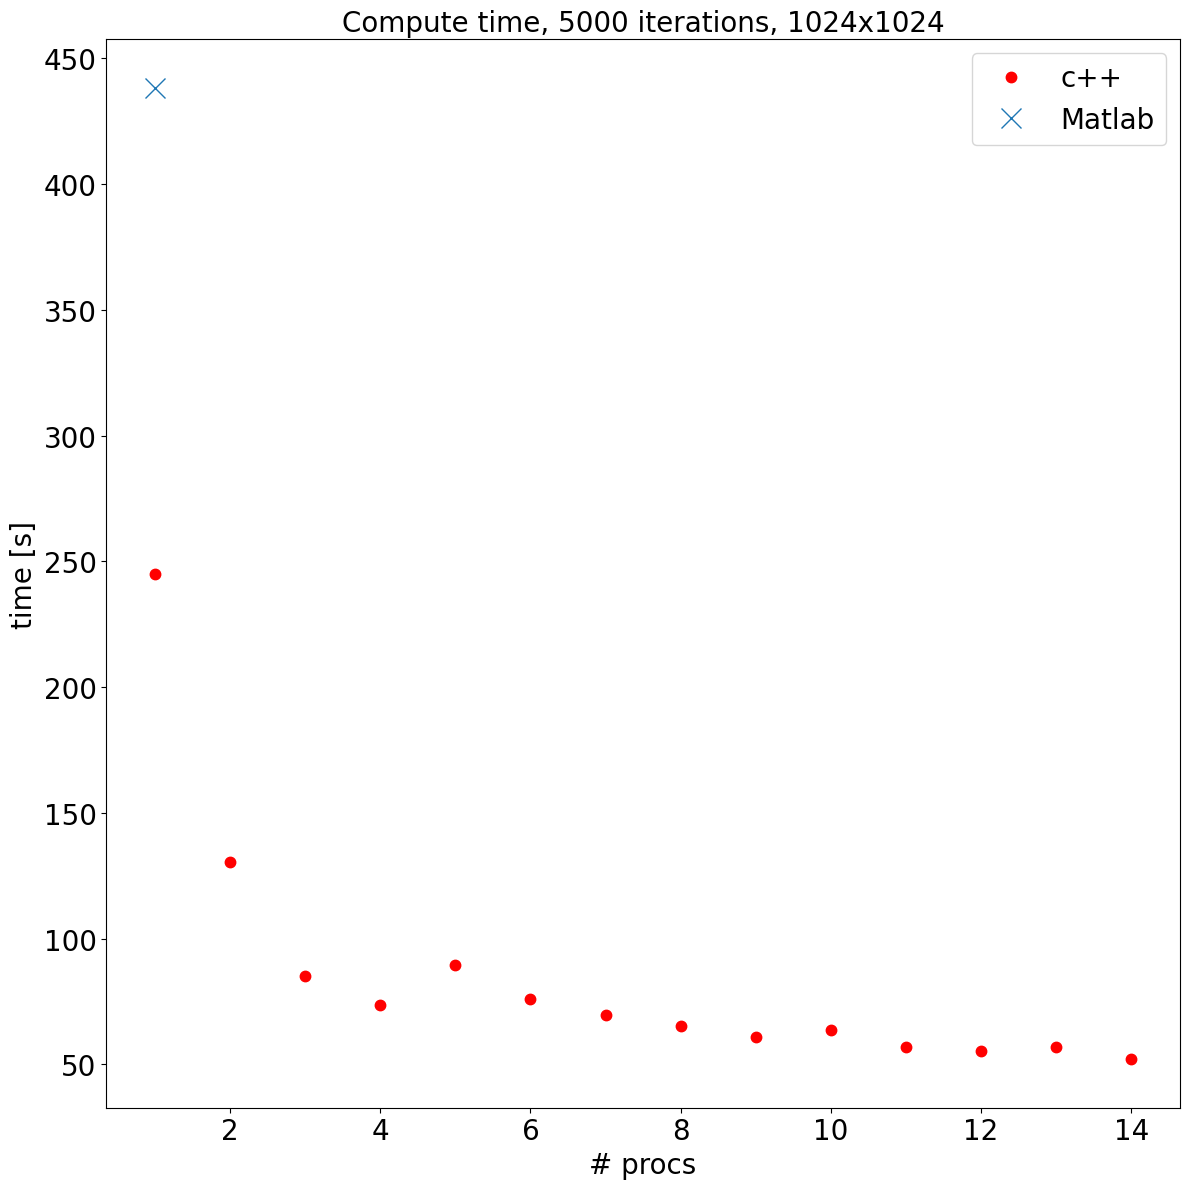

In [6]:
# Run the script with run_parallel.sh (from linux with . run_parallel.sh) to evaluate execution time with increasing number of cores.
# You can change the number of cores you want to test modifinyng the for loop range in the script
fname = "times.txt"
times = np.loadtxt(fname, dtype=np.double, delimiter=',').T

fname = "outSMatlab/time.txt"
timeMatlab = np.loadtxt(fname, dtype=np.double, delimiter=',')
fig, ax = plt.subplots(figsize=(12,12))
plt.plot(times[0,:], times[1,:], ".", label="c++", color="red", markersize=15)
plt.plot(1, timeMatlab,"x", label="Matlab", markersize=15)
ax.set_xlabel("# procs", size=20)
ax.set_ylabel("time [s]", size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Compute time, 5000 iterations, 1024x1024", size=20)
plt.legend(loc="best",fontsize=20)
fig.tight_layout()

# plt.savefig("figs/5000.1024.png", format="png")
plt.show()

In [44]:
# Run the script with run_different_grids.sh (from linux with . run_different_grids.sh) to evaluate execution time with increasing number of cores and grid size.
# You can change the number of cores you want to test modifinyng the for loop range in the script
fig, ax = plt.subplots(figsize=(12,9))
colors = ["red","blue","black","green","purple","orange","grey"]
for i in range(7,11):
    fname = "times/times_grids" + str(i) + ".txt"
    times = np.loadtxt(fname, dtype=np.double, delimiter=',').T
    plt.plot(times[0,:], times[1,:], marker="x", label=str(2**i) + "^2", color=colors[i-7], markersize=15)

ax.set_xlabel("# procs", size=20)
ax.set_ylabel("time [s]", size=20)
#ax.set_yscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Compute time for different grid sizes, 1000 iterations", size=20)
plt.legend(loc="best",fontsize=15)
plt.grid()
fig.tight_layout()

plt.savefig("figs/times1.png", format="png")
plt.show()

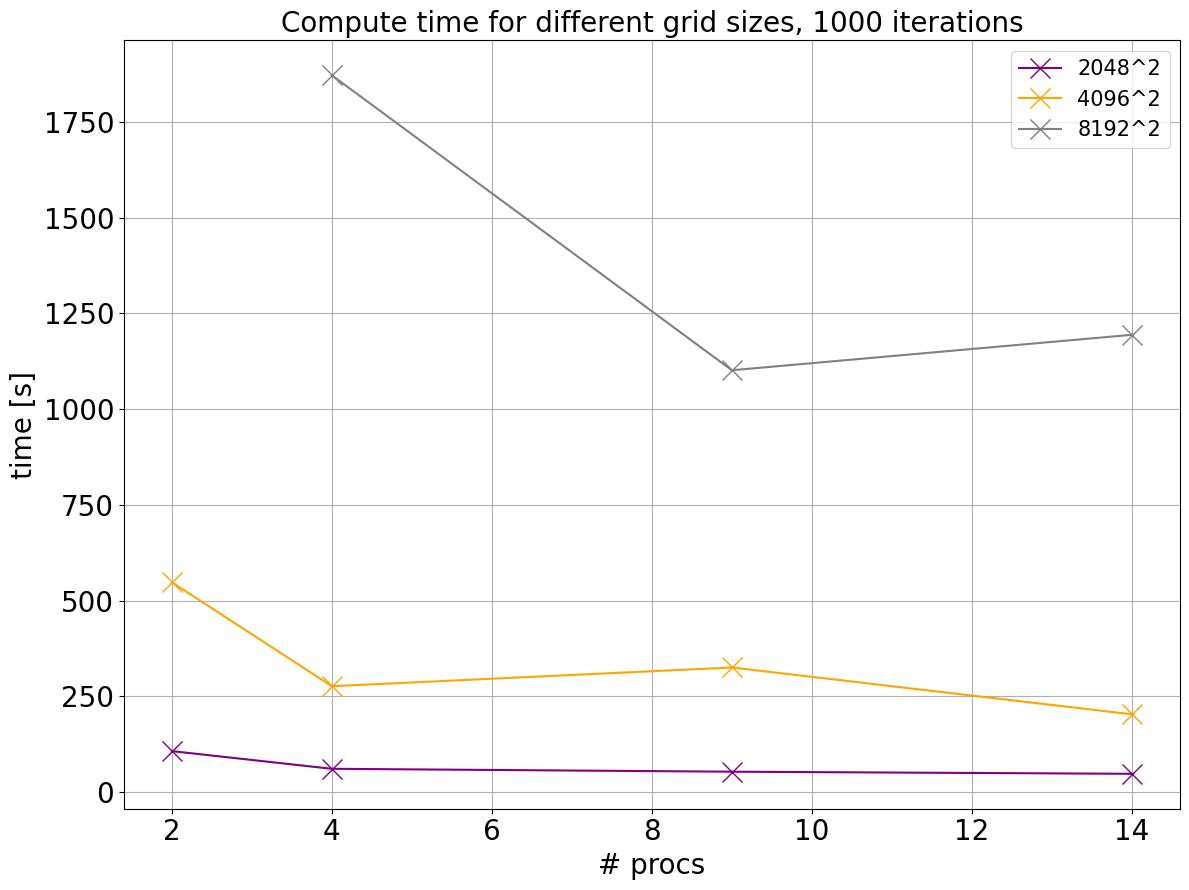

In [45]:
fig, ax = plt.subplots(figsize=(12,9))
colors = ["red","blue","black","green","purple","orange","grey"]
for i in range(11,14):
    fname = "times/times_grids" + str(i) + ".txt"
    times = np.loadtxt(fname, dtype=np.double, delimiter=',').T
    plt.plot(times[0,:], times[1,:], marker="x", label=str(2**i) + "^2", color=colors[i-7], markersize=15)

ax.set_xlabel("# procs", size=20)
ax.set_ylabel("time [s]", size=20)
#ax.set_yscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Compute time for different grid sizes, 1000 iterations", size=20)
plt.legend(loc="best",fontsize=15)
fig.tight_layout()
plt.grid()
plt.savefig("figs/times2.png", format="png")
plt.show()

In [47]:
fig, ax = plt.subplots(figsize=(12,9))
colors = ["red","blue","black","green","purple","orange","grey"]
for i in range(7,14):
    fname = "times/times_grids" + str(i) + ".txt"
    times = np.loadtxt(fname, dtype=np.double, delimiter=',').T
    plt.plot(times[0,:], times[1,:], marker="x", label=str(2**i) + "^2", color=colors[i-7], markersize=15)

ax.set_xlabel("# procs", size=20)
ax.set_ylabel("log(time [s])", size=20)
ax.set_yscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("Compute time for different grid sizes, 1000 iterations", size=20)
plt.legend(loc="best",fontsize=15)
fig.tight_layout()
plt.grid()
plt.savefig("figs/times3.png", format="png")
plt.show()